In [1]:
# Importing libraries

import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import yaml
from git_root import git_root
from transformers import AutoTokenizer

In [2]:
# adding git_root and local imports
my_git_root = git_root()
sys.path.append(my_git_root)

from src import flatten, contains_text, extract_table

In [3]:
# importing data
df_documents_path = f'{my_git_root}/data/documents_cleaned.csv'
df_documents = pd.read_csv(df_documents_path)

In [4]:
df_documents

,name,text
0,aalto-university.md,# Aalto University \n\n## Aalto University Re...
1,aberystwyth-university.md,# Research Data Management Policy \n\nVersion...
2,aston-university.md,# Research Data Management Policy \n\nJuly 20...
3,bangor-university.md,# Data Protection Policy \n\n Rev Date Purpos...
4,brunel-university-london.md,# Brunel University Research Data Management P...
...,...,...
137,universität-rostock.md,# Research Data Policy of the University of Ro...
138,universität-siegen.md,# Research-Data-Policy of the University of Si...
139,universität-stuttgart.md,# Research data management policy of the Unive...
140,utrecht-university.md,# University policy framework for research dat...


In [5]:
document_names = df_documents['name'].to_list()
documents = df_documents['text'].to_list()

In [6]:
num_headings = []

for document in documents:
    document_chunked = re.split(rf'\n\s*#*\s*\d+\.(\d+\.?){{0,{5-1}}}\s+', document)
    num_headings.append(len(document_chunked))

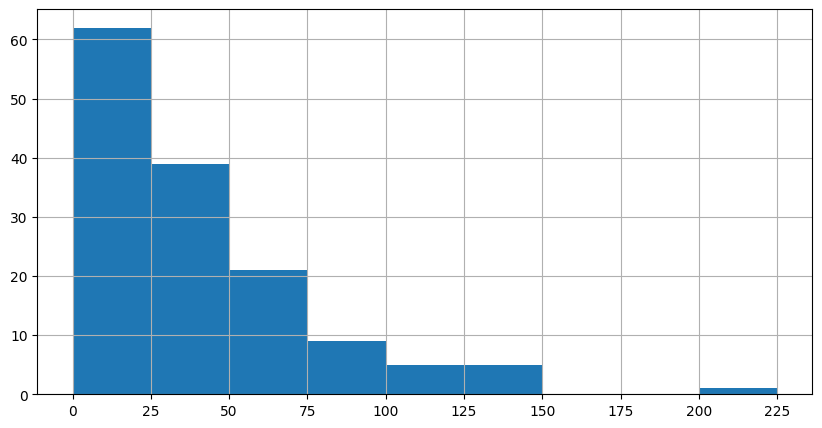

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,5))
ax.hist(num_headings, bins=np.arange(0, np.max(num_headings) + 25, 25))
ax.set_xticks(np.arange(0, np.max(num_headings) + 25, 25))
ax.grid()
plt.savefig(f'{my_git_root}/notebooks/images/num_headings_documents.svg')
plt.show()

In [6]:
def chunk_document_regex(document, regex_delimiters):
    documents_chunked = []
    for key, value in regex_delimiters.items():
        document_chunked = re.split(value, document)
        document_chunked = [chunk for chunk in document_chunked if chunk is not None]
        documents_chunked.append(document_chunked)

    documents_chunked_len = [len(document_chunked) for document_chunked in documents_chunked]
    print(documents_chunked_len)
    max_index = np.argmax(documents_chunked_len)
    max_len = documents_chunked_len[max_index]
    return documents_chunked, max_index, max_len

In [10]:
document_delimiters = []

headings_level = 1
list_level = 1

explicit_delimiters = {
    'headings': rf'\s*#{{1,{headings_level}}}\s*',
    'list': rf'\n\s*#*\s*\d+\.(\d+\.?){{0,{list_level-1}}}\s+',
}
for document in documents:
        documents_chunked, max_index, max_len = chunk_document_regex(document, explicit_delimiters)
        my_delimiter = list(explicit_delimiters.keys())[max_index]
        print(my_delimiter)
        document_delimiters.append(my_delimiter)

[30, 6]
headings
[2, 15]
list
[67, 8]
headings
[110, 33]
headings
[9, 21]
list
[41, 4]
headings
[19, 8]
headings
[14, 1]
headings
[118, 50]
headings
[35, 10]
headings
[2, 4]
list
[51, 4]
headings
[15, 29]
list
[24, 15]
headings
[66, 1]
headings
[121, 9]
headings
[6, 7]
list
[47, 1]
headings
[74, 15]
headings
[8, 1]
headings
[58, 5]
headings
[44, 1]
headings
[34, 1]
headings
[8, 1]
headings
[12, 1]
headings
[2, 1]
headings
[29, 17]
headings
[80, 28]
headings
[65, 8]
headings
[68, 12]
headings
[12, 5]
headings
[51, 1]
headings
[35, 7]
headings
[57, 11]
headings
[38, 16]
headings
[41, 15]
headings
[4, 6]
list
[7, 6]
headings
[40, 9]
headings
[10, 1]
headings
[22, 1]
headings
[17, 6]
headings
[9, 12]
list
[12, 5]
headings
[20, 19]
headings
[41, 1]
headings
[17, 10]
headings
[11, 1]
headings
[38, 9]
headings
[53, 9]
headings
[34, 10]
headings
[39, 1]
headings
[44, 1]
headings
[19, 8]
headings
[95, 14]
headings
[25, 1]
headings
[9, 2]
headings
[34, 1]
headings
[10, 25]
list
[31, 1]
headings


In [34]:
num_headings = []

for document in documents:
    document_chunked = re.split(rf'\n\s*#*\s*\d+\.(\d+\.?){{0,{5-1}}}\s+', document)
    num_headings.append(len(document_chunked))

In [35]:
num_headings

[11,
 29,
 67,
 85,
 41,
 7,
 55,
 1,
 203,
 29,
 7,
 31,
 57,
 29,
 1,
 17,
 13,
 1,
 29,
 1,
 9,
 1,
 9,
 1,
 1,
 23,
 47,
 85,
 41,
 49,
 9,
 1,
 85,
 37,
 31,
 45,
 11,
 11,
 29,
 1,
 7,
 23,
 23,
 9,
 37,
 41,
 19,
 1,
 91,
 23,
 35,
 11,
 1,
 31,
 45,
 1,
 69,
 73,
 49,
 1,
 25,
 79,
 133,
 25,
 19,
 47,
 53,
 1,
 33,
 73,
 1,
 21,
 117,
 35,
 23,
 1,
 19,
 25,
 45,
 1,
 47,
 41,
 37,
 59,
 37,
 55,
 41,
 19,
 69,
 19,
 131,
 49,
 119,
 13,
 133,
 1,
 77,
 33,
 91,
 9,
 113,
 57,
 55,
 31,
 1,
 71,
 21,
 69,
 109,
 51,
 109,
 19,
 137,
 65,
 15,
 1,
 59,
 15,
 33,
 37,
 37,
 7,
 67,
 1,
 91,
 143,
 53,
 17,
 1,
 9,
 93,
 71,
 61,
 11,
 9,
 25,
 1,
 1,
 1,
 7,
 33,
 1]

In [36]:
np.argmax(num_headings)

np.int64(8)

In [37]:
df_documents.iloc[15]['name']

'fachhochschule-joanneum.md'

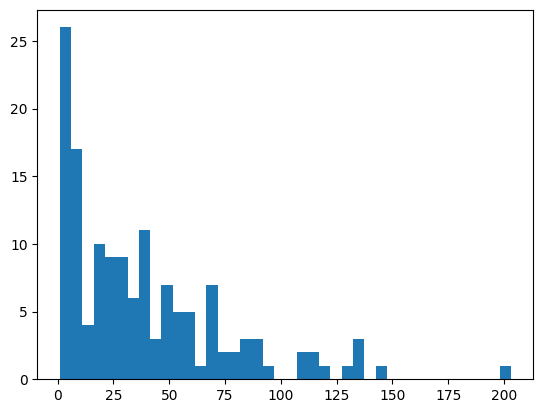

In [43]:
import matplotlib.pyplot as plt

fig = plt.hist(num_headings, bins=40)
plt.savefig(f'{my_git_root}/notebooks/images/num_headings_documents.svg')
plt.show()

In [11]:
explicit_delimiters = {
    'headings': rf'\s*#{{1,{1}}}\s*',
    'list': rf'\n\s*#*\s*\d+\.\s+',
}

explicit_delimiters['list']

'\\n\\s*#*\\s*\\d+\\.\\s+'

In [12]:
np.unique_counts(document_delimiters)

UniqueCountsResult(values=array(['headings', 'list'], dtype='<U8'), counts=array([121,  21]))